In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, alpha= 0.1)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.4 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

# Gaussian Mixtures

### One Dimensional Example
- Generate some number of unique Gaussian distributions

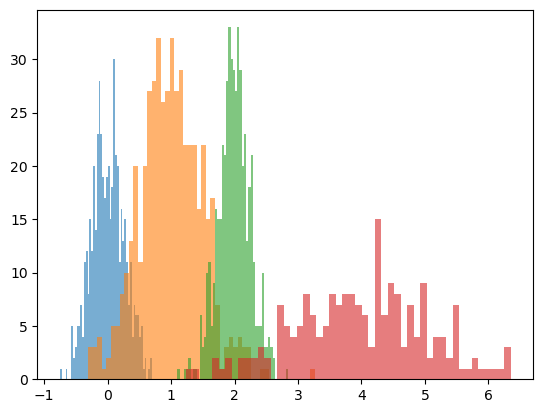

In [19]:
dist1 = np.random.normal(loc= 0, scale= 0.25, size= 500)
dist2 = np.random.normal(loc= 1, scale= 0.5, size= 500)
dist3 = np.random.normal(loc= 2, scale= 0.25, size= 500)
dist4 = np.random.normal(loc= 4, scale= 1, size= 200)

data_1d = \
np.concatenate([dist1, dist2, dist3, dist4])

plt.hist(dist1, bins= 50, alpha= 0.6)
plt.hist(dist2, bins= 50, alpha= 0.6)
plt.hist(dist3, bins= 50, alpha= 0.6)
plt.hist(dist4, bins= 50, alpha= 0.6)
plt.show()

### Demonstrate Expectation Maximization for 1D Example
#### Initialization

INITIAL VALUES
[ 0.8463035  -0.15527816  2.29228841  1.48935446]
[1.78282403 1.78282403 1.78282403 1.78282403]
[0.25 0.25 0.25 0.25]


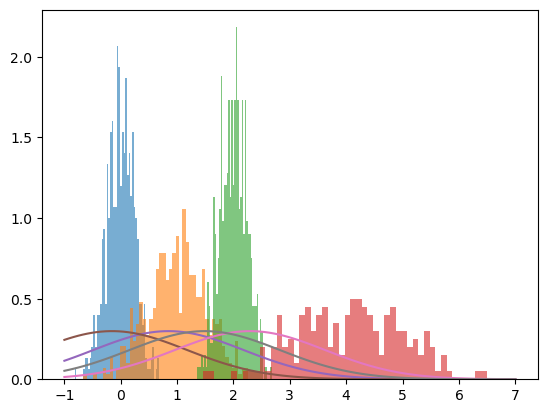

In [4]:
## Estimate number of clusters k
k = 4

## Initialize the mean positions, variances, and cluster weights
mu =  np.random.choice(data_1d, size= k)
sigma = np.array([data_1d.var()] * k)
phi = np.array([1/k] * k)

print('INITIAL VALUES')
print(mu)
print(sigma)
print(phi)


x = np.linspace(np.floor(data_1d.min()), np.ceil(data_1d.max()), 100)

plt.hist(dist1, bins= 50, density= True, alpha= 0.6)
plt.hist(dist2, bins= 50, density= True, alpha= 0.6)
plt.hist(dist3, bins= 50, density= True, alpha= 0.6)
plt.hist(dist4, bins= 50, density= True, alpha= 0.6)

for dist in np.arange(k):
    plt.plot(x, sp.stats.norm(mu[dist], np.sqrt(sigma[dist])).pdf(x))
plt.show()

#### Execution of the EM method

[1.030593   0.00637102 4.04915736 1.9952647 ]
[0.46001207 0.24676342 0.94844947 0.24680882]
[0.26253675 0.31613879 0.11799031 0.30333414]


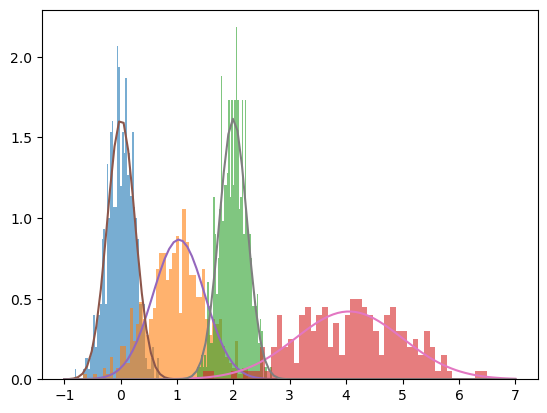

In [5]:
for iter in np.arange(100):
    gamma_num = []
    for j in np.arange(phi.shape[0]):
        gamma_num.append(phi[j] * sp.stats.norm(mu[j], np.sqrt(sigma[j])).pdf(data_1d))
    gamma_num = np.array(gamma_num).T

    for j in np.arange(phi.shape[0]):
        gamma = gamma_num[:, j] / gamma_num.sum(axis= 1)
        phi[j] = gamma.mean()
        mu[j] = (gamma * data_1d).sum() / gamma.sum()
        sigma[j] = (gamma * (data_1d - mu[j])**2).sum() / gamma.sum()

    
print(mu)
print(np.sqrt(sigma))
print(phi)

plt.hist(dist1, bins= 50, density= True, alpha= 0.6)
plt.hist(dist2, bins= 50, density= True, alpha= 0.6)
plt.hist(dist3, bins= 50, density= True, alpha= 0.6)
plt.hist(dist4, bins= 50, density= True, alpha= 0.6)
for dist in np.arange(k):
    plt.plot(x, sp.stats.norm(mu[dist], np.sqrt(sigma[dist])).pdf(x))
plt.show()

### Two Dimensional Example 
- Generate some number of unique Gaussian distributions

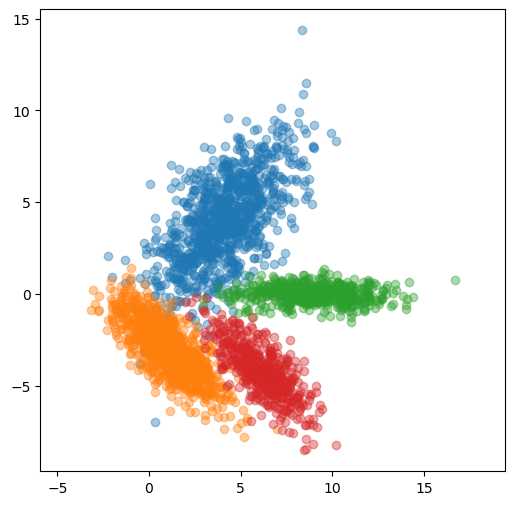

In [18]:
#dist1 = np.random.multivariate_normal(mean= (0, 0), cov= ((0.25, 0), (0, 0.25)), size= 500)
#dist2 = np.random.multivariate_normal(mean= (1, 0), cov= ((0.5, 0), (0, 0.5)), size= 500)
#dist3 = np.random.multivariate_normal(mean= (2, 0), cov= ((0.25, 0), (0, 0.25)), size= 500)
#dist4 = np.random.multivariate_normal(mean= (4, 0), cov= ((1, 0), (0, 1)), size= 500)

dist1 = np.random.multivariate_normal(mean= (4, 4), cov= ((4, 3), (3, 6)), size= 1000)
dist2 = np.random.multivariate_normal(mean= (1, -3), cov= ((2, -1.5), (-1.5, 2)), size= 1000)
dist3 = np.random.multivariate_normal(mean= (9, 0), cov= ((5, 0), (0, 0.25)), size= 500)
dist4 = np.random.multivariate_normal(mean= (6, -4), cov= ((2, -1.5), (-1.5, 2)), size= 500)

data_2d = np.concatenate([dist1, dist2, dist3, dist4])

plt.figure(figsize= (6, 6))
plt.scatter(x= dist1[:, 0], y= dist1[:, 1], alpha= 0.4)
plt.scatter(x= dist2[:, 0], y= dist2[:, 1], alpha= 0.4)
plt.scatter(x= dist3[:, 0], y= dist3[:, 1], alpha= 0.4)
plt.scatter(x= dist4[:, 0], y= dist4[:, 1], alpha= 0.4)
plt.axis('equal')
plt.show()

In [8]:
k = 4
mu = data_2d[np.random.randint(data_2d.shape[0], size= k), :]
sigma = [np.cov(data_2d.T)] * k
phi = np.array([1/k] * k)

for iter in np.arange(100):
    gamma_num = []
    for j in np.arange(phi.shape[0]):
        gamma_num.append(phi[j] * sp.stats.multivariate_normal(mean= mu[j], cov= sigma[j]).pdf(data_2d))
    gamma_num = np.array(gamma_num).T

    for j in np.arange(phi.shape[0]):
        gamma = gamma_num[:, j] / gamma_num.sum(axis= 1)
        phi[j] = gamma.mean()
        mu[j] = np.matmul(gamma, data_2d) / gamma.sum()
        sigma[j] = np.cov(data_2d.T, aweights= gamma, bias= True)

#### Attempt K-Means clustering
- Estimate K

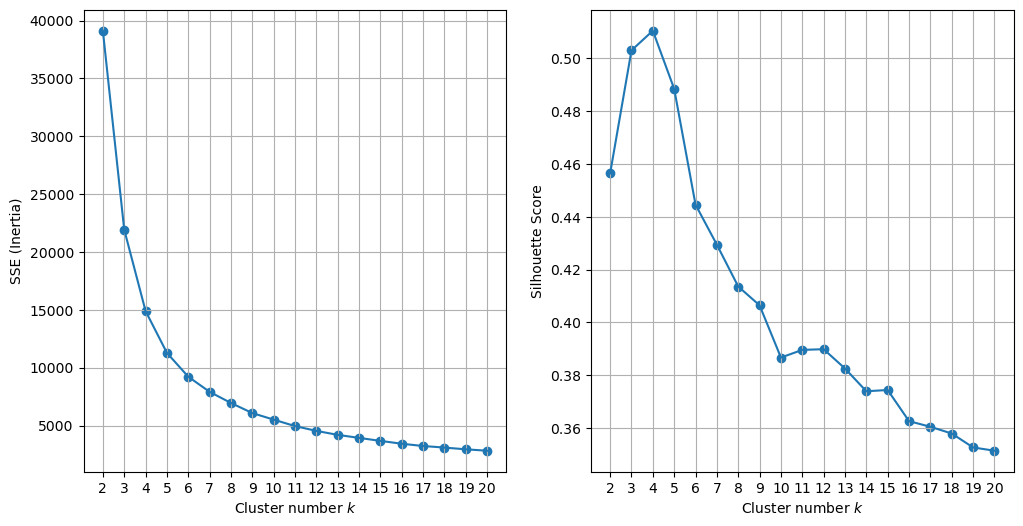

In [11]:
sse_sil = np.empty((0, 3))
for k in np.arange(2, 21, 1):
    kmeans = KMeans(n_clusters= k, n_init= 10)
    kmeans.fit(data_2d)
    labels = kmeans.labels_
    
    sse_sil = np.vstack([sse_sil, 
                         np.array([k, kmeans.inertia_, silhouette_score(data_2d, labels)])])
    
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (12, 6))

ax1.scatter(x= sse_sil[:, 0], y= sse_sil[:, 1])
ax1.plot(sse_sil[:, 0], sse_sil[:, 1])
ax1.set_xlabel('Cluster number $k$')
ax1.set_ylabel('SSE (Inertia)')
ax1.grid()
ax1.set_xticks(ticks= np.arange(2, 21, 1))

ax2.scatter(x= sse_sil[:, 0], y= sse_sil[:, 2])
ax2.plot(sse_sil[:, 0], sse_sil[:, 2])
ax2.set_xlabel('Cluster number $k$')
ax2.set_ylabel('Silhouette Score')
ax2.grid()
ax2.set_xticks(ticks= np.arange(2, 21, 1))
plt.show()

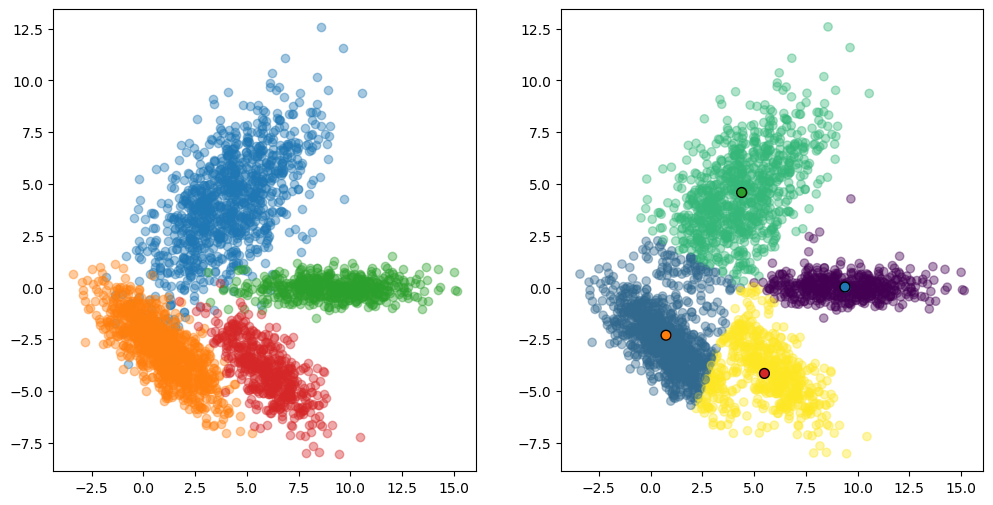

In [12]:
km = KMeans(n_clusters= 4, n_init= 'auto').fit(data_2d)
centers = km.cluster_centers_
labels = km.labels_
    
    
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (12, 6))

ax1.scatter(x= dist1[:, 0], y= dist1[:, 1], alpha= 0.4)
ax1.scatter(x= dist2[:, 0], y= dist2[:, 1], alpha= 0.4)
ax1.scatter(x= dist3[:, 0], y= dist3[:, 1], alpha= 0.4)
ax1.scatter(x= dist4[:, 0], y= dist4[:, 1], alpha= 0.4)
ax1.axis('equal')

ax2.scatter(x= data_2d[:, 0], y= data_2d[:, 1], alpha= 0.4, c= labels)
ax2.axis('equal')
for j in np.arange(len(centers)):
    ax2.scatter(x= centers[j, 0], y= centers[j, 1], marker= 'o', s= 40)
    ax2.scatter(x= centers[j, 0], y= centers[j, 1], marker= 'o', s= 50, edgecolors= 'black', facecolors= 'none')
plt.show()

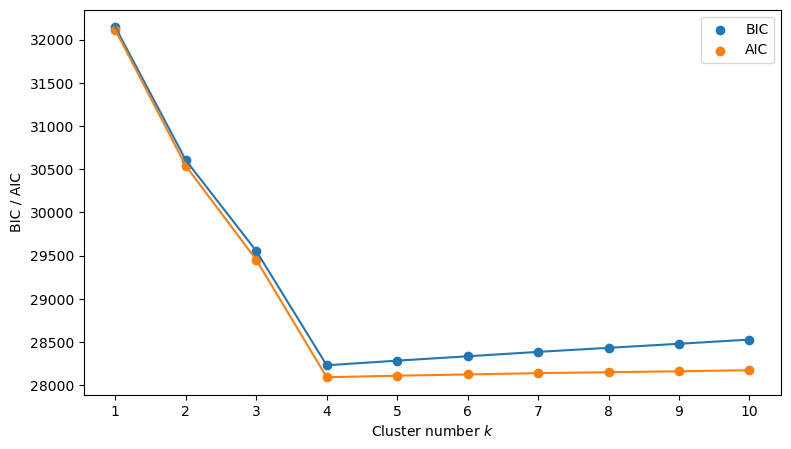

In [13]:
bic_aic = np.empty((0, 3))
for k in np.linspace(1, 10, 10, dtype= int):
    gm = GaussianMixture(n_components= k).fit(data_2d)
    bic_aic = np.vstack([bic_aic, np.array([k, gm.bic(data_2d), gm.aic(data_2d)])]) 
    
    
plt.figure(figsize= (9, 5))
plt.scatter(x= bic_aic[:, 0], y= bic_aic[:, 1], label= 'BIC')
plt.plot(bic_aic[:, 0], bic_aic[:, 1])
plt.scatter(x= bic_aic[:, 0], y= bic_aic[:, 2], label= 'AIC')
plt.plot(bic_aic[:, 0], bic_aic[:, 2])
plt.xlabel('Cluster number $k$')
plt.ylabel('BIC / AIC')
plt.xticks(ticks= np.linspace(1, 10, 10, dtype= int))
plt.legend()
plt.show()

/var/folders/sf/lh5vs79n7sg9l5kff8g_h9zm0000gn/T/ipykernel_45251/277274175.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


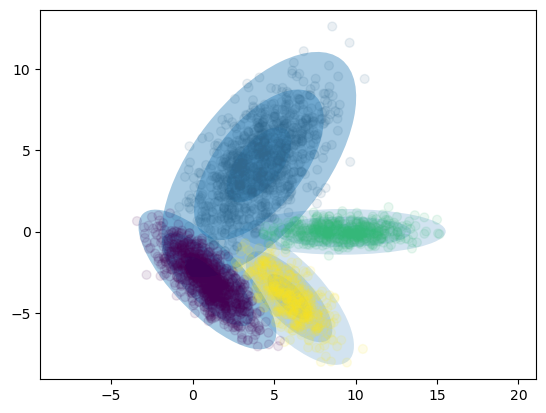

In [14]:
k = 4
gm = GaussianMixture(n_components= k)
gm.fit(data_2d)

plot_gmm(gm, data_2d)

In [15]:
for i in np.arange(phi.shape[0]):
    print(mu[i])
    print(sigma[i])
    print(phi[i])
    print()

[ 0.9178223  -2.93776582]
[[ 2.00104578 -1.52958268]
 [-1.52958268  2.04087709]]
0.33493058531603714

[4.06520982 4.09122171]
[[3.97266502 2.779218  ]
 [2.779218   5.37440229]]
0.33122783349249457

[ 9.2131358  -0.01210901]
[[4.42973462 0.01262716]
 [0.01262716 0.21818279]]
0.16599102970957166

[ 5.93443264 -3.99537901]
[[ 1.7332541  -1.3180621 ]
 [-1.3180621   1.93374188]]
0.1678505514818965



In [16]:
for ki in np.arange(k):
    print(f'Cluster {ki + 1}') 
    print(f'Mean \n {gm.means_[ki]}')
    print(f'Covariance \n {gm.covariances_[ki]}')
    print(f'Weight \n {gm.weights_[ki]}')
    print()
    

Cluster 1
Mean 
 [ 0.91159215 -2.93424171]
Covariance 
 [[ 1.98802565 -1.52549263]
 [-1.52549263  2.04139891]]
Weight 
 0.33465010533947465

Cluster 2
Mean 
 [4.07028045 4.10171438]
Covariance 
 [[3.95992529 2.75833118]
 [2.75833118 5.33077949]]
Weight 
 0.3305304838781591

Cluster 3
Mean 
 [ 9.21000189 -0.01178683]
Covariance 
 [[4.44303236 0.01128354]
 [0.01128354 0.21824384]]
Weight 
 0.16609793417895946

Cluster 4
Mean 
 [ 5.92179874 -3.99058417]
Covariance 
 [[ 1.7614976  -1.33028502]
 [-1.33028502  1.94565907]]
Weight 
 0.16872147660340683

